# Linear regression with one variable

### Hypothesis function $h_\theta(x)$

$$h_\theta(x)=\theta \cdot x =\theta^T x = \theta_0 + \theta_1 x_1$$


### J cost function

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 $$

vectorized version:
$$ \text{if } X \in \mathbb{R}^{m\times n} 
\text{, and }\theta \in \mathbb{R}^m 
$$
$$J(\theta) = \frac{1}{2m}(X\theta -\vec{y})^T (X\theta -\vec{y}) $$

### the gradient of the cost

$$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})\cdot x_j^{(i)}$$

vectorized version:
$$\frac{\partial}{\partial \theta_j}J(\theta) = X^T (X\theta -\vec{y}) $$

### Gradient descent
repeat until convergence:
$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)}) \cdot x_j^{(i)} \text{ for } j=1,2,...m$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## Generate toy datasets

In [2]:
original_X, original_y = datasets.make_regression(n_samples=200, n_features=1, n_informative=1, bias=20, noise=25)

In [3]:
original_X.shape

(200, 1)

In [4]:
original_y.shape

(200,)

## Plotting the data

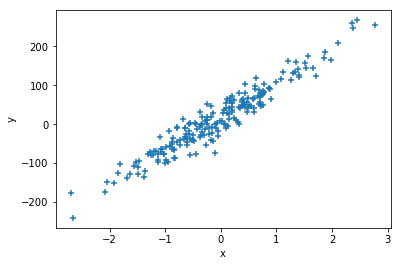

In [5]:
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(original_X, original_y, marker='+')

In [6]:
X = np.insert(original_X, 0, 1, axis=1)
y = original_y.reshape(-1,1)
X.shape

(200, 2)

In [7]:
X[0:10,:]

array([[ 1.        , -0.44852445],
       [ 1.        , -0.28499781],
       [ 1.        , -0.36879105],
       [ 1.        ,  0.19914456],
       [ 1.        , -0.16986356],
       [ 1.        ,  0.34808734],
       [ 1.        , -1.07810052],
       [ 1.        ,  0.14256456],
       [ 1.        ,  0.2755481 ],
       [ 1.        ,  1.12730781]])

In [8]:
initial_theta = np.zeros((X.shape[1],1))

In [9]:
initial_theta.shape

(2, 1)

In [10]:
learning_rate = 0.01
num_iterations = 1500

## Gradient Descent

In [11]:
def compute_cost(X_values, y_values, theta):
    m = len(X_values)
    h = X_values.dot(theta)
    return np.dot((h-y_values).T,h-y_values)/(2*m)
    #return np.sum((h - y_values) **2)/(2*m)
    
def gradient_descent(X_values, y_values, theta, learningRate, iterations):
    m = X_values.shape[0]
    n = X_values.shape[1]
    cost = np.zeros(iterations)
    for i in range(iterations):
        h = X_values.dot(theta)
        delta = np.dot(X_values.T, (h - y_values))/m
        theta = theta -learningRate*delta
        cost[i] = compute_cost(X_values, y_values, theta)
                
    return theta, cost

def predict(original_X_values, theta):
    X_values = np.insert(original_X_values, 0, 1, axis=1)
    return X_values.dot(theta)

In [12]:
J = compute_cost(X, y, initial_theta)
J

array([[ 3754.78095983]])

In [13]:
theta, j_cost = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)

In [14]:
theta

array([[ 17.91802019],
       [ 85.74507428]])

In [15]:
print(j_cost[-1])

275.29513629


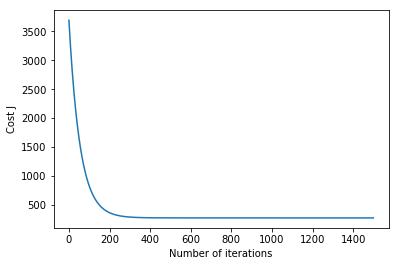

In [16]:
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.plot(range(num_iterations), j_cost)

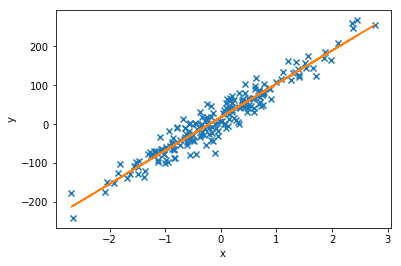

In [17]:
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(original_X, original_y, marker='x')
plt.plot(original_X, predict(original_X, theta), color='C1')

## By sklearn.linear_model.LinearRegression

In [18]:
from sklearn import linear_model

In [19]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(original_X, original_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

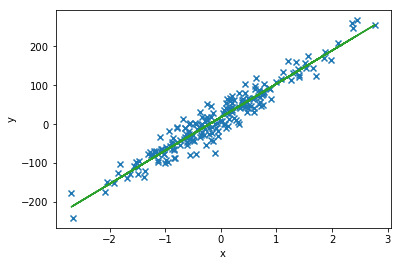

In [20]:
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(original_X, original_y, marker='x')
#plt.plot(original_X, predict(original_X, theta), color='C1')
plt.plot(original_X, linear_reg.predict(original_X), color='C2')

In [21]:
our_predict = predict([[1]], theta)
sklearn_predict = linear_reg.predict([[1]])
print("For x = 1, we predict y = {0} ".format(our_predict.flat[0]))
print("For x = 1, sklearn predicts y = {0} ".format(sklearn_predict.flat[0]))

For x = 1, we predict y = 103.6630944665511 
For x = 1, sklearn predicts y = 103.66325867831182 


## Visualizing J(theta_0, theta_1)

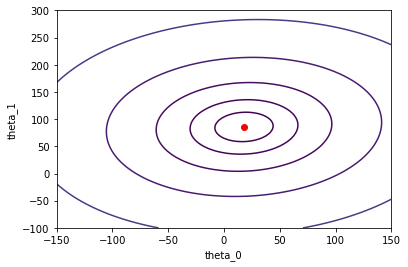

In [22]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-150, 150, 100)
theta1_vals = np.linspace(-100, 300, 100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])
#Fill out J_vals
for i, e in enumerate(theta0_vals):
    for j, e2 in enumerate(theta1_vals):
        t = np.array([[e],[e2]])
        J_vals[i,j] = compute_cost(X, y, t)

plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 5, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.scatter(theta.flat[0], theta.flat[1], color='red')

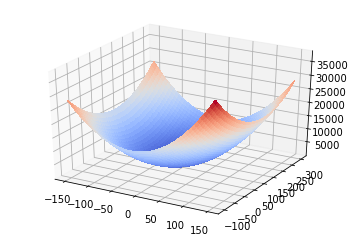

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)

ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Linear regression with multiple variables

## Using the boston house-prices dataset in scikit-learn

In [24]:
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.target.shape)
print(boston.DESCR)

(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher rat

In [25]:
from sklearn.utils import shuffle

In [26]:
original_X, original_y = shuffle(boston.data, boston.target, random_state=1)
offset = 350 # 70% training, 30% test
X_train, y_train = original_X[:offset], original_y[:offset]
X_test, y_test = original_X[offset:], original_y[offset:]
X_train.shape

(350, 13)

In [27]:
y_train.shape

(350,)

In [28]:
def featureNormalize(Xvals):
    mean = np.mean(Xvals, axis=0)
    std = np.std(Xvals, axis=0)
    Xnorm = (Xvals-mean)/std
    return Xnorm, mean, std

In [29]:
X, mean, std = featureNormalize(X_train)
y = y_train.reshape(-1,1)
X = np.insert(X, 0, 1, axis=1)

In [30]:
initial_theta = np.zeros((X.shape[1], 1))
learning_rate = 0.05
num_iterations = 200

In [31]:
J = compute_cost(X, y, initial_theta)
J

array([[ 292.4022]])

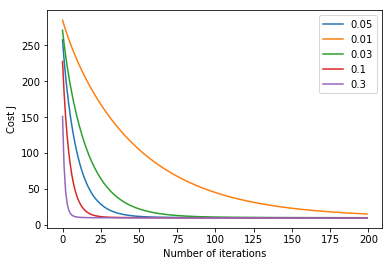

In [32]:
theta, j_cost = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
theta1, j_cost1 = gradient_descent(X, y, initial_theta, 0.01, num_iterations)
theta2, j_cost2 = gradient_descent(X, y, initial_theta, 0.03, num_iterations)
theta3, j_cost3 = gradient_descent(X, y, initial_theta, 0.1, num_iterations)
theta4, j_cost4 = gradient_descent(X, y, initial_theta, 0.3, num_iterations)
theta5, j_cost5 = gradient_descent(X, y, initial_theta, 1, num_iterations)
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.plot(range(num_iterations), j_cost, color='C0', label='0.05')
plt.plot(range(num_iterations), j_cost1, color='C1', label='0.01')
plt.plot(range(num_iterations), j_cost2, color='C2', label='0.03')
plt.plot(range(num_iterations), j_cost3, color='C3', label='0.1')
plt.plot(range(num_iterations), j_cost4, color='C4', label='0.3')
#plt.plot(range(num_iterations), j_cost5, color='C5', label='1') # too high
plt.legend()

In [33]:
print(j_cost[-1])

9.75516317067


In [34]:
theta

array([[ 22.43921342],
       [ -0.89155514],
       [  0.63123383],
       [ -0.39408166],
       [  0.83995588],
       [ -1.54564745],
       [  3.13690451],
       [ -0.58030916],
       [ -2.87398049],
       [  1.35632968],
       [ -1.07921387],
       [ -1.85273378],
       [  0.97722112],
       [ -2.92098184]])

In [35]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [36]:
linear_reg.coef_

array([ -1.18598117e-01,   3.60865144e-02,  -1.12950656e-02,
         3.17808869e+00,  -1.86498041e+01,   4.33474018e+00,
        -1.59608370e-02,  -1.58583899e+00,   2.92535768e-01,
        -1.30611050e-02,  -9.52833810e-01,   9.74466412e-03,
        -4.22047050e-01])

In [37]:
linear_reg.intercept_

34.437816485782733

## Normal Equations
The closed-form solution to linear regression:

$$ \theta = (X^TX)^{-1}X^{T}\vec{y}$$

In [38]:
def normalEquations(X_values, y_values):
    theta_value = np.linalg.inv(np.dot(X_values.T, X_values)).dot(X_values.T).dot(y_values)
    return theta_value

In [39]:
normalEq_X = np.insert(X_train, 0, 1, axis=1)
normalEq_theta = normalEquations(normalEq_X, y_train)
normalEq_theta

array([  3.44378165e+01,  -1.18598117e-01,   3.60865144e-02,
        -1.12950656e-02,   3.17808869e+00,  -1.86498041e+01,
         4.33474018e+00,  -1.59608370e-02,  -1.58583899e+00,
         2.92535768e-01,  -1.30611050e-02,  -9.52833810e-01,
         9.74466412e-03,  -4.22047050e-01])

## Compute error rate

$$\frac{1}{2m_{test}}\sum_{i=1}^{m_{test}}(h_{\Theta}(x_{test}^{(i)})-y_{test}^{(i)})^2$$

In [40]:
X_test_nor = X_test
X_test_nor = X_test_nor - mean
X_test_nor = X_test_nor / std
my_test_error_rate = predict(X_test_nor, theta) - y_test.reshape(-1,1)
my_test_error_rate = my_test_error_rate.T.dot(my_test_error_rate) / (2*len(X_test))
my_test_error_rate

array([[ 14.64429232]])

In [41]:
sklean_error_rate = linear_reg.predict(X_test) - y_test
sklean_error_rate = sklean_error_rate.dot(sklean_error_rate) / (2*len(X_test))
sklean_error_rate

14.518345763432007

In [42]:
normalEq_error_rate = predict(X_test, normalEq_theta) - y_test
normalEq_error_rate = normalEq_error_rate.dot(normalEq_error_rate) / (2*len(X_test))
normalEq_error_rate

14.518345763431734